In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# impostazione per vedere tutte le colonno di un DataFrame
pd.set_option('display.max_columns',None)

In [3]:
this_path = '/Users/Joe/Dropbox/Formazione ML IFOA/2. Regression/Housing'
#this_path = 'C:/Users/giovanni.ravaioli/Downloads/2. Regression/Housing'

In [4]:
df = pd.read_csv(this_path+'/housing.csv')

In [5]:
df.shape

(1460, 81)

TRAIN / TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

FEATURES

In [108]:
features = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','TotRmsAbvGrd']

X_train = train_df[numerical_features].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[numerical_features].copy()
y_test = test_df['SalePrice'].copy()

In [138]:
### definisco già prima la funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

# K-NEAREST NEIGHBORS (KNN)

In [153]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train, y_train)

TRAIN SET
MAE:  25538.585570776253
R2:  0.7425761535483546


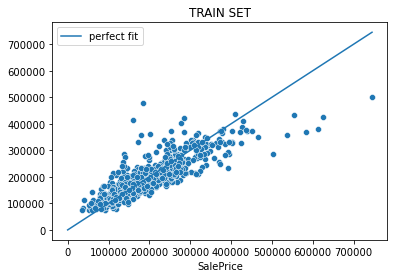

TEST SET
MAE:  30217.78410958904
R2:  0.700722023117415


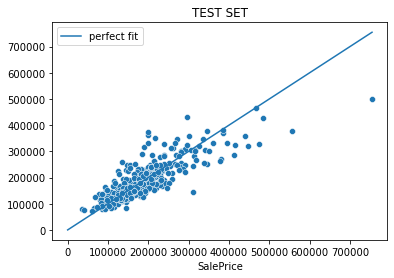

In [154]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### K parameter

Facciamo un ciclo cambiando il valore di K, cioè il numero di vicini da considerare

In [172]:
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 20)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]
        


K: 1
TRAIN SET
MAE:  519.9223744292237
R2:  0.9975637997054667
TEST SET
MAE:  38163.32602739726
R2:  0.4857591095371667

K: 2
TRAIN SET
MAE:  18980.276712328767
R2:  0.8468423010941387
TEST SET
MAE:  34091.864383561646
R2:  0.6191445475316978

K: 3
TRAIN SET
MAE:  22245.866362252666
R2:  0.8101882803942873
TEST SET
MAE:  31897.564383561643
R2:  0.6699021560559203

K: 4
TRAIN SET
MAE:  24249.272602739726
R2:  0.7708237727574064
TEST SET
MAE:  31343.358904109587
R2:  0.6830296031975077

K: 5
TRAIN SET
MAE:  25538.585570776253
R2:  0.7425761535483546
TEST SET
MAE:  30217.78410958904
R2:  0.700722023117415

K: 6
TRAIN SET
MAE:  26560.495738203957
R2:  0.7203201336827162
TEST SET
MAE:  30191.966666666667
R2:  0.710431266529878

K: 7
TRAIN SET
MAE:  26955.801174168304
R2:  0.7139688950067004
TEST SET
MAE:  30233.774559686895
R2:  0.6963998886344245

K: 8
TRAIN SET
MAE:  27092.31095890411
R2:  0.7153405391095973
TEST SET
MAE:  30315.47602739726
R2:  0.6908564314585999

K: 9
TRAIN SET
MAE:  2

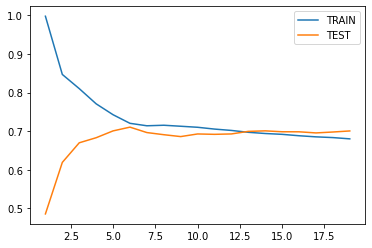

In [173]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

Si vede bene per k<5 c'è un forte overfitting, in quanto il modello performa benissimo sul train set e male sul test set. Da 5 in poi l'overfitting scompare, a discapito però della performance assoluta, che decresce lentamente

### Features scaling

Un aspetto che può influenzare fortemente la bontà delle previsioni del k-NN sono le diverse scale a cui si presentano le varie features. Per esempio è evidente che la superficie di un piano non è paragonabile con il numero di macchine del garage.

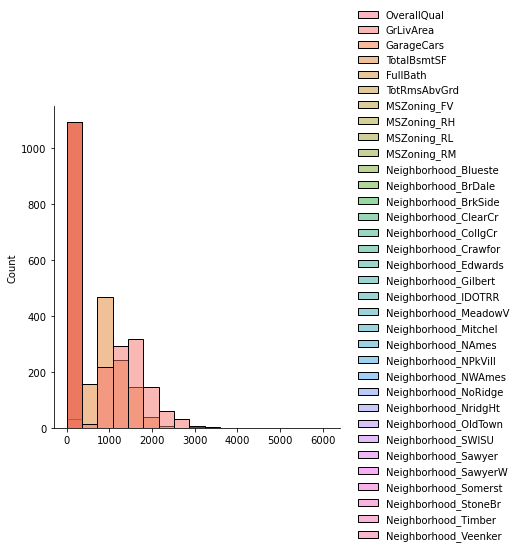

In [26]:
sns.displot(X_train)
plt.show()

Per questo motivo si usa normalizzare i dati

#### MinMaxScaler()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

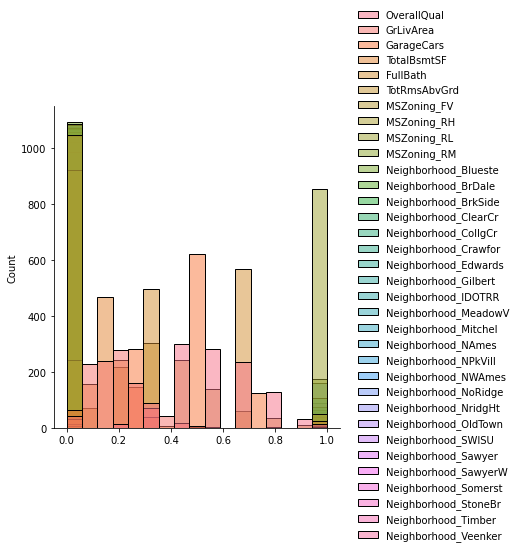

In [30]:
sns.displot(X_train_scaled)
plt.show()

Si sono persi i nomi delle feature perchè lo scaler dà in output un numpy.array multidimensionale. Per recuperarle basta ritrasformarlo in un DataFrame:

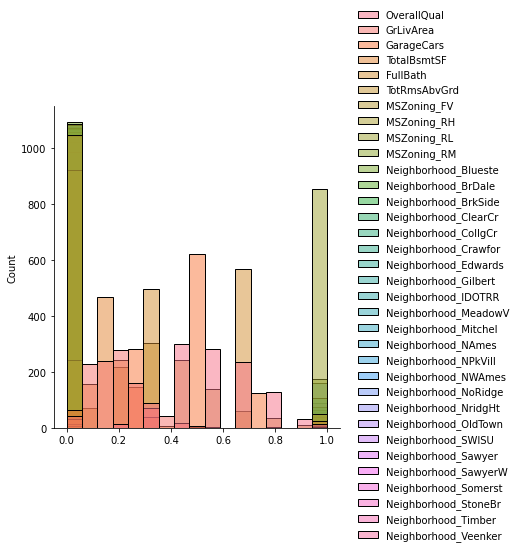

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

Come si vede il MinMaxScaler, basandosi sul massimo e sul minimo di ongi feature, ha il vantaggio di rendere ben paragonabili le scale delle features tra di loro. Potrebbe essere una buona scelta in questo caso, ma non è detto però che sia la scelta migliore in ogni caso. Queste features sono tutte positive, cioè non sono mai minori di zero. Ci sono spesso innvece contesti in cui alcune feature hanno anche valori minori di zero, e potrebbe essere una buona scelta quella di avere tutte le feature centrate sullo zero. A questo scopo per esempio si può usare lo StandardScaler.

#### StandardScaler()

Lo standard scaler si basa sulle deviazioni standard di ogni feature, e come si vede facilmente, le centra tutte attorno allo zero.

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

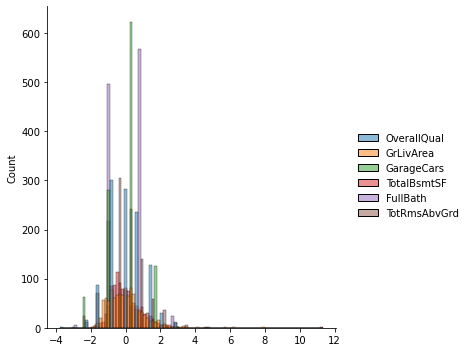

In [193]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

In [204]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train_scaled, y_train)

TRAIN SET
MAE:  19299.90502283105
R2:  0.8548153354642068


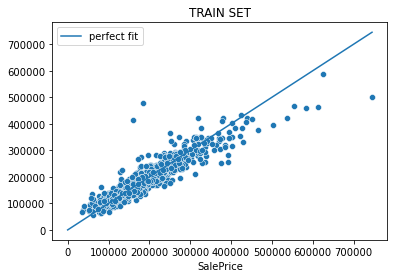

TEST SET
MAE:  22811.76602739726
R2:  0.8384348954658294


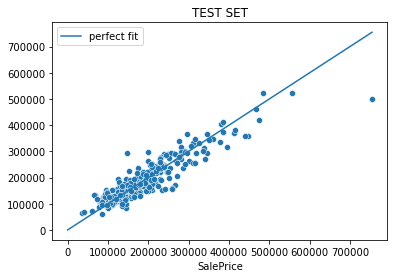

In [205]:
### EVALUATION

train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

# DECISION TREE

TRAIN SET
MAE:  491.6500761035007
R2:  0.9986098393167883


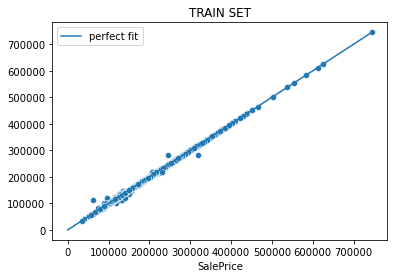

TEST SET
MAE:  28258.626027397262
R2:  0.7738562953196999


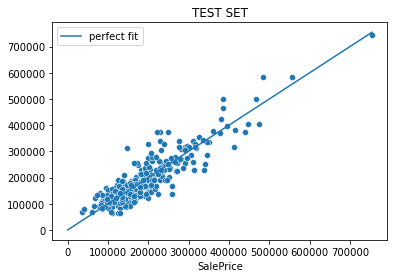

In [112]:
### FITTING

model = DecisionTreeRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

E' evidente che c'è dell'overfitting, perchè sul training set ho delle previsioni praticamente perfette, mentre sul test set va molto peggio.

Posso plottare le scelte dell'albero decisionale (conviene settare max_depth basso)

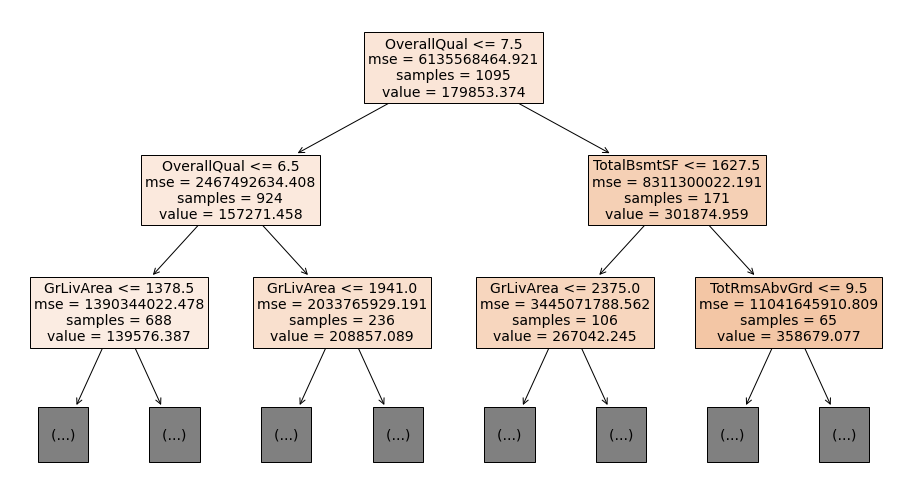

In [113]:
from sklearn import tree
plt.figure(figsize=(16,9))
_ = tree.plot_tree(model, max_depth=2, filled=True, feature_names=list(X_train.columns), fontsize=14)

Posso anche ricavare l'importanza relativa delle feature. Gli alberi decisionali si usano in effetti anche in fase di Exploratory Data Analysis, quando si vuole capire quali sono le feature più importanti (fino ad ora avevamo usato solo le correlazioni)

### Features importance

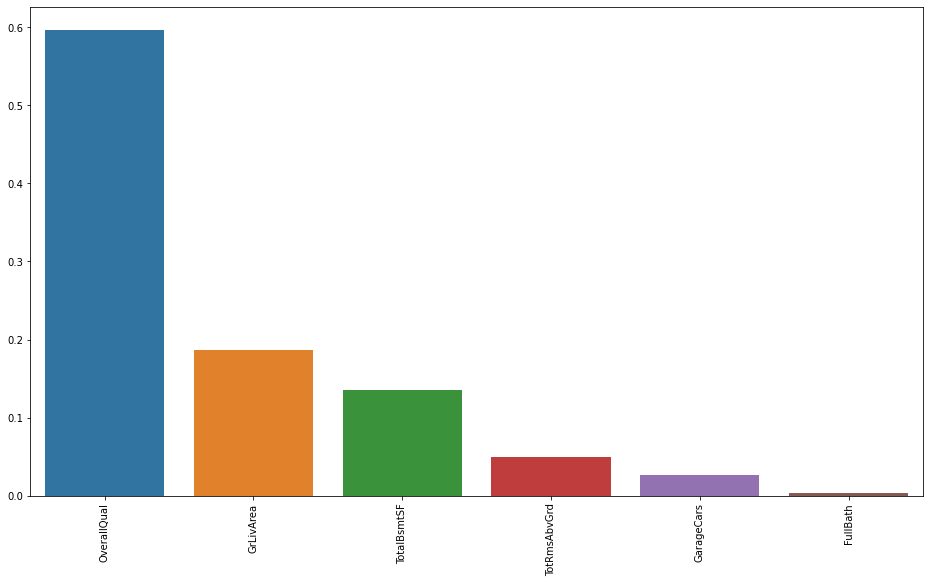

In [114]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

Proviamo a evitare l'overfitting limitando la max_depth dell'albero decisionale. Facciamo un ciclo su più valori. 
NB ci sarebbero tanti altri parametri su cui andare a lavorare ma noi ci limiteremo solo a max_depth

### max_depth parameter

In [149]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    
    print('\nMax_depth:',n)
    
    model = DecisionTreeRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  29270.21975592393
R2:  0.730334595971369
TEST SET
MAE:  30764.064659985288
R2:  0.7312838665785322

Max_depth: 4
TRAIN SET
MAE:  24378.56382544377
R2:  0.8192438074712409
TEST SET
MAE:  26660.63613719023
R2:  0.7981006708981189

Max_depth: 5
TRAIN SET
MAE:  21231.664855187322
R2:  0.8655144100379026
TEST SET
MAE:  23172.325620994605
R2:  0.855396454900917

Max_depth: 6
TRAIN SET
MAE:  18310.10230337116
R2:  0.8986616095038582
TEST SET
MAE:  23473.31664775842
R2:  0.843096346858947

Max_depth: 7
TRAIN SET
MAE:  16142.613663086846
R2:  0.9210458884729397
TEST SET
MAE:  23211.176020339954
R2:  0.8392556580817585

Max_depth: 8
TRAIN SET
MAE:  13217.368592253477
R2:  0.9402291991165947
TEST SET
MAE:  24796.40434155306
R2:  0.8131846546710173

Max_depth: 9
TRAIN SET
MAE:  11204.878075864055
R2:  0.95415500731588
TEST SET
MAE:  25290.15877746267
R2:  0.8068066655380224

Max_depth: 10
TRAIN SET
MAE:  8496.90391342029
R2:  0.9699074046201834
TEST SET
MAE:  26195.46

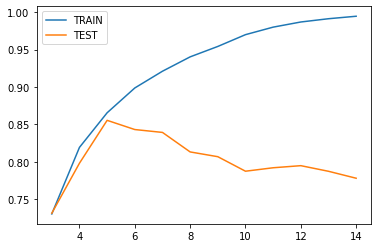

In [150]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

E' evidente come all'aumentare di max_depth (e quindi della complessità del modello) aumenti anche l'overfitting, cioè la distanza tra le performance di training e di test. Potremmo usare mex_depth=5, dove c'è il massimo sul test set.
Il problema dell'overfitting si può in parte risolvere usando un ensable di alberi decisionali: le Random Forest

# RANDOM FOREST

TRAIN SET
MAE:  8591.201288178261
R2:  0.9689971538226467


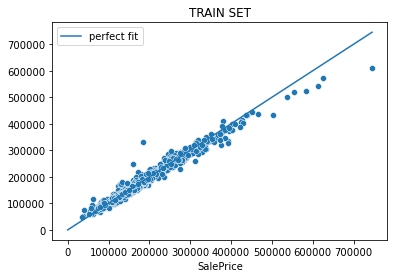

TEST SET
MAE:  21076.30955599621
R2:  0.8693193112892601


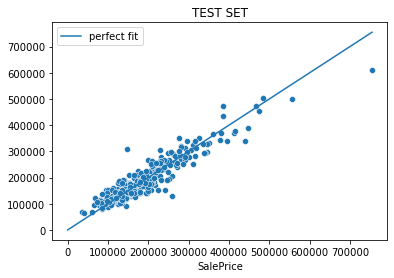

In [174]:
from sklearn.ensemble import RandomForestRegressor

### FITTING
model = RandomForestRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

Senza settare alcun parametro già l'overiftting, seppure ancora presente, è molto meno pronunciato rispetto all'albero decisinoale.

Anche qui posso ricavare l'importanza relativa delle feature

### Features importance

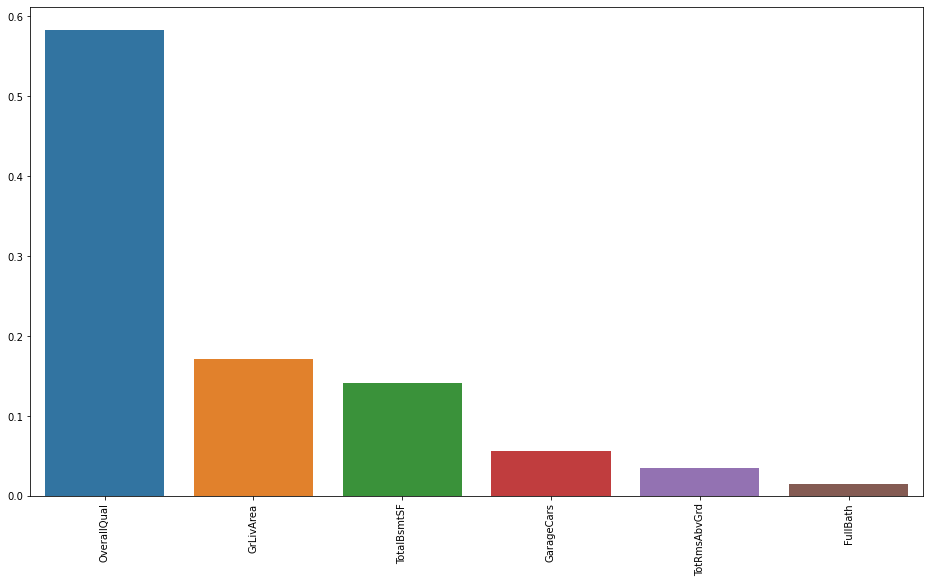

In [177]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

### max_depth parameter

Facendo lo stesso lavoro di prima possiamo fare un primo tuning del parametro max_depth

In [147]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    print('\nMax_depth:',n)
    model = RandomForestRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  24431.546117307145
R2:  0.79099607131625
TEST SET
MAE:  24752.485332927048
R2:  0.8030317451835979

Max_depth: 4
TRAIN SET
MAE:  21186.251652833926
R2:  0.8499724021693128
TEST SET
MAE:  21985.587420710333
R2:  0.8423434426609366

Max_depth: 5
TRAIN SET
MAE:  18899.58208249482
R2:  0.8829846044559562
TEST SET
MAE:  20317.597128606198
R2:  0.8702593908692597

Max_depth: 6
TRAIN SET
MAE:  17224.288681913702
R2:  0.9052691418973068
TEST SET
MAE:  20041.823397236996
R2:  0.8785756164510103

Max_depth: 7
TRAIN SET
MAE:  15485.732581366768
R2:  0.9271935865607043
TEST SET
MAE:  19976.829872180857
R2:  0.8812795483888617

Max_depth: 8
TRAIN SET
MAE:  14005.654075567547
R2:  0.9364152534571857
TEST SET
MAE:  20562.530147297595
R2:  0.8731042180807224

Max_depth: 9
TRAIN SET
MAE:  12468.547332258326
R2:  0.9508075285282944
TEST SET
MAE:  20770.471702406325
R2:  0.8734725907162862

Max_depth: 10
TRAIN SET
MAE:  11274.311292162782
R2:  0.9589672308248736
TEST SET
MAE

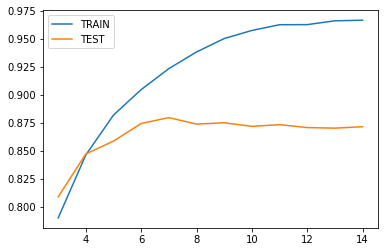

In [143]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

Possiamo scegliere di usare max_depth = 7, dove c'è il picco di performance sul test set